<a href="https://colab.research.google.com/github/ananyatrivedi1/PyTorch/blob/main/02_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary & Multiclass Classification
Binary Classification, Multi-Class Classification (assigned one label each), Multi-Label Classification (more fuzzy)

- Convert the inputs into numerical representations (images converted into height, width and colour channels)
- Shape = `[32, 3, 224, 224]`; why is the batch size 32?
  * Stochastic Gradient Descent where we average a vast amount of data -> Saddle Point (plus computing stuff for 1000 batches is not efficient) & vanishing gradients.
  * This size is large enough to benefit from parallel processing on hardware like GPUs, **but small enough to provide noisy gradients that help the model escape local minima and converge to a more "flat" minimum, which typically generalizes better**

### Creating Data


In [ ]:
import torch
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, random_state=42, noise=0.05)
len(X), len(y)

(1000, 1000)

In [ ]:
# @title
import sklearn
import torch

make_circle, length,

print 5

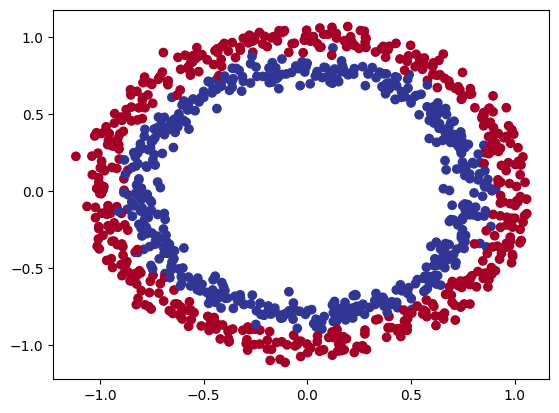

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap = plt.cm.RdYlBu)

In [ ]:
# @title
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)
len(X), len(y)

(1000, 1000)

In [ ]:
# @title
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

#### Convert to a nice looking DataFrame

Create data frame, "" : X[:0],

In [ ]:
import pandas as pd

data1 = ({
    "X1" : X[:,0],
    "X2" : X[:,1],
    "ylabel" : y
})
table1 = pd.DataFrame(data1)
table1.head(10)

,X1,X2,ylabel
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


plt.cm.
colour will be decided by y, cmap=RdYlBl

Check the input and output shapes

In [ ]:
# @title
type(X)

numpy.ndarray

Convert to torch tensor from numpy. (Default is float32).

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
# @title
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

Check typesof X and data types of X and y

In [ ]:
# @title
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

Splitting Data into Training & Test Set using from `sklearn.model_selection import train_test_split` and initialize X_train, X_test, y_train and y_test.


In [ ]:
# @title
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

1. Build a device agnostic model
2. Construct a model
3. Loss function and optimizer
4. Create a training and testing loop

In [ ]:
# @title
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

If we upscale the number of layers, our model has more opportunity to learn from the data (2 features vs 5). The out features of layer 1 should match the in features of layer 2.

Use two linear layers.
Forward is nested function (layer2(layer1(x))

In [ ]:
# @title
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer2(self.layer1(x))

Move the model to the device.

In [ ]:
# @title
model0 = CircleModelV0().to(device)

Try nn.Sequential(
  nn.Lin...),
).to(device)

In [ ]:
# @title
model1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

Check state dict

In [ ]:
model1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1610,  0.6351],
                      [-0.1918,  0.6405],
                      [-0.3602,  0.5406],
                      [ 0.3029,  0.5876],
                      [-0.1149, -0.3834]])),
             ('0.bias', tensor([-0.6329, -0.4112,  0.2448, -0.6851,  0.0546])),
             ('1.weight',
              tensor([[-0.4074,  0.3665,  0.0945,  0.1042, -0.3523]])),
             ('1.bias', tensor([-0.1159]))])

## The entire model

**1. Forward Pass** -> use X_Train with any model. Go from raw model outputs to prediction labels.
`logits -> prediction -> probabilities -> prediction labels`.

**2. Calculate the Loss** -> the loss function from logistic regression.

**3. Zero the gradients**

**4. Perform back-propagation**

**5. Step the optimizer (gradient descent)**

### 1. Forward Pass

In [ ]:
model0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model0.eval()
with torch.inference_mode():
  y_logits = model0(X_test.to(device))
y_logits[:10]

tensor([[ 0.0674],
        [-0.0134],
        [ 0.3476],
        [-0.0123],
        [ 0.4564],
        [ 0.4062],
        [ 0.0926],
        [ 0.1912],
        [ 0.3426],
        [-0.0176]])

Model has not been trained yet, so the outputs are random.

`y = xW^T + b`

**Logits (z)**: raw outputs of y. Doesn't mean that much to us right now.

We need to convert these raw logits into **prediction probabilities** by passing them to some kind of activation function (ex: `sigmoid(z)`).

These probabilities will then be converted into **prediction labels** (0 or 1). Neat trick with rounding.

Perform the forward pass using test data and any model (ideally do with inference mode)

Now, if we wanna compare these predictions to the `y_test`, they must be in a form where comparisions can be made (shrink the range of the function to 0 and 1). To compare apples to apples, we need the sigmoid function (converts *raw logits to prediction probabilites*).

To process these raw outputs, use an activation function.

`Sigmoid -> 1/(1+e^{-x})`

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5168],
        [0.4967],
        [0.5860],
        [0.4969],
        [0.6122]])

These are now in the form of **prediction probabilities** (`y_pred_probs)`. Now, we want to convert these probability values into their classifications.

If `y_pred_probs >= 0.5, y=1` (class 1)

If `y_pred_probs < 0.5, y=0` (class 0)

In [ ]:
y_preds = torch.round(y_pred_probs)

Now, we have the prediction probabilities after rounding (or applying a piece-wise functions).

We can attempt to do this all in one line.

We go from **logits (`z`) -> prediction probabilities (`sigmoid(z)`) -> prediction labels (`yhat`)**

We will need squeeze to compare to `y_test`

In [ ]:
y_preds.squeeze()[:5], y_test[:5]

(tensor([1., 0., 1., 0., 1.]), tensor([1., 0., 1., 0., 1.]))

In [ ]:
y_pred_labels = torch.round(torch.sigmoid(model0(X_test.to(device))))
y_pred_labels.squeeze()[:5] # to get it into the same dimension as y

tensor([1., 0., 1., 0., 1.], grad_fn=<SliceBackward0>)

### 2. Loss Function

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


BCEWithLogitsLoss combines the loss function (`L(yhat, y)`) and the sigmoid (`sigmoid(z)`) function in one.

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.01)


`BCEWithLogitsLoss` expects `Logits` as the parameter insted of y_predictions. It's more numerically stable this way. If we use `BCELoss()`, then we will pass `torch.sigmoid(y_logits)` in the parameter.

Accuracy: (# correct predictions)/(total number of predictions)

`torch.eq()` decides where two tensors are equal.

In [ ]:
def accuracy_fn(y_pred, y_true):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

If a loss function measures how wrong your model is, I like to think of **evaluation metrics** as measuring how right it is.

**Explain BCEWithLogitsLoss()**

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.01)

### Building a training & Testing Loop

1. Set the seed (for both torch and cuda)
2. Put data onto target device
3. Build the for loop with epochs for train data
    0. Set to train mode
    1. Forward Pass (`logits -> pred probs -> pred labels`)
    2. Calculate Loss (`y_logits & y_train`) & Accuracy (`y_true=y_train, y_pred=y_pred`)
    3. Optimizer zero grad
    4. Back propagation
    5. Step optimizer (gradient descent)
4. Do the same steps on test data (set to inference mode and eval)

We can later functionize all of this.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model0.train()

  train_logits = model0(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))

  trainLoss = loss_fn(train_logits, y_train)
  trainAcc = accuracy_fn(y_true=y_train, y_pred=train_preds)

  optimizer.zero_grad()
  trainLoss.backward()
  optimizer.step()

  model0.eval()
  with torch.inference_mode():
    test_logits = model0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    testLoss = loss_fn(test_logits, y_test)
    testAcc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  # Print out what's happening every 10 epochs
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {trainLoss:.5f}, Accuracy: {trainAcc:.2f}% | Test loss: {testLoss:.5f}, Test acc: {testAcc:.2f}%")

Epoch: 0 | Loss: 0.70685, Accuracy: 56.38% | Test loss: 0.69804, Test acc: 58.00%
Epoch: 10 | Loss: 0.70685, Accuracy: 56.38% | Test loss: 0.69804, Test acc: 58.00%
Epoch: 20 | Loss: 0.70685, Accuracy: 56.38% | Test loss: 0.69804, Test acc: 58.00%
Epoch: 30 | Loss: 0.70685, Accuracy: 56.38% | Test loss: 0.69804, Test acc: 58.00%
Epoch: 40 | Loss: 0.70685, Accuracy: 56.38% | Test loss: 0.69804, Test acc: 58.00%
Epoch: 50 | Loss: 0.70685, Accuracy: 56.38% | Test loss: 0.69804, Test acc: 58.00%
Epoch: 60 | Loss: 0.70685, Accuracy: 56.38% | Test loss: 0.69804, Test acc: 58.00%
Epoch: 70 | Loss: 0.70685, Accuracy: 56.38% | Test loss: 0.69804, Test acc: 58.00%
Epoch: 80 | Loss: 0.70685, Accuracy: 56.38% | Test loss: 0.69804, Test acc: 58.00%
Epoch: 90 | Loss: 0.70685, Accuracy: 56.38% | Test loss: 0.69804, Test acc: 58.00%


But the model isn't really learning anything. To inspect, we will make predictions and visualize them.

Convert the prediction probabilities to labels.

`torch.round()` follows the IEEE 754 standard for rounding, which means it rounds half to even. For example, both 2.5 and 3.5 would round to 2 and 4 respectively (the nearest even integer). **So in our case what happens with 0.5?**

## Making predictions & evaluating model

In [ ]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [38]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

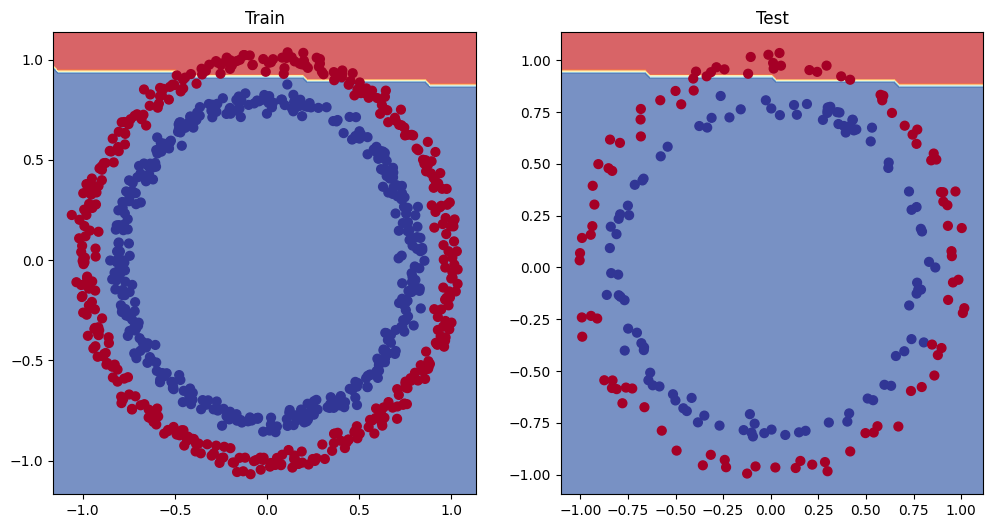

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model0, X_test, y_test)

Model is random guessing, and splitting the data into halves.

### Try adding additional layers & hidden units.

1. Add more hidden layers (deeper)
2. Add more hidden units (wider)
3. Use non-linear activation functions
4. Train for longer (increasing epochs)
5. Change hyper-parameters
6. Change the loss function

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=10)
    self.layer2=nn.Linear(in_features=10, out_features=10)
    self.layer3=nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x)))

In [ ]:
circleModel1 = CircleModelV1()
circleModel1


CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
optimizer = torch.optim.SGD(params=circleModel1.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000


for epoch in range(epochs):
  circleModel1.train()
  train_logits = circleModel1(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))

  train_loss = loss_fn(train_logits, y_train)
  train_acc = accuracy_fn(train_preds, y_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  circleModel1.eval()
  with torch.inference_mode():
    test_logits = circleModel1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(test_preds, y_test)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69369, Accuracy: 50.25% | Test loss: 0.69269, Test acc: 50.00%
Epoch: 200 | Loss: 0.69351, Accuracy: 50.12% | Test loss: 0.69282, Test acc: 49.50%
Epoch: 300 | Loss: 0.69339, Accuracy: 50.50% | Test loss: 0.69295, Test acc: 49.00%
Epoch: 400 | Loss: 0.69329, Accuracy: 50.38% | Test loss: 0.69309, Test acc: 48.50%
Epoch: 500 | Loss: 0.69322, Accuracy: 49.88% | Test loss: 0.69322, Test acc: 49.50%
Epoch: 600 | Loss: 0.69317, Accuracy: 49.50% | Test loss: 0.69335, Test acc: 53.00%
Epoch: 700 | Loss: 0.69313, Accuracy: 49.38% | Test loss: 0.69347, Test acc: 50.50%
Epoch: 800 | Loss: 0.69309, Accuracy: 50.00% | Test loss: 0.69358, Test acc: 51.00%
Epoch: 900 | Loss: 0.69307, Accuracy: 50.62% | Test loss: 0.69368, Test acc: 47.50%


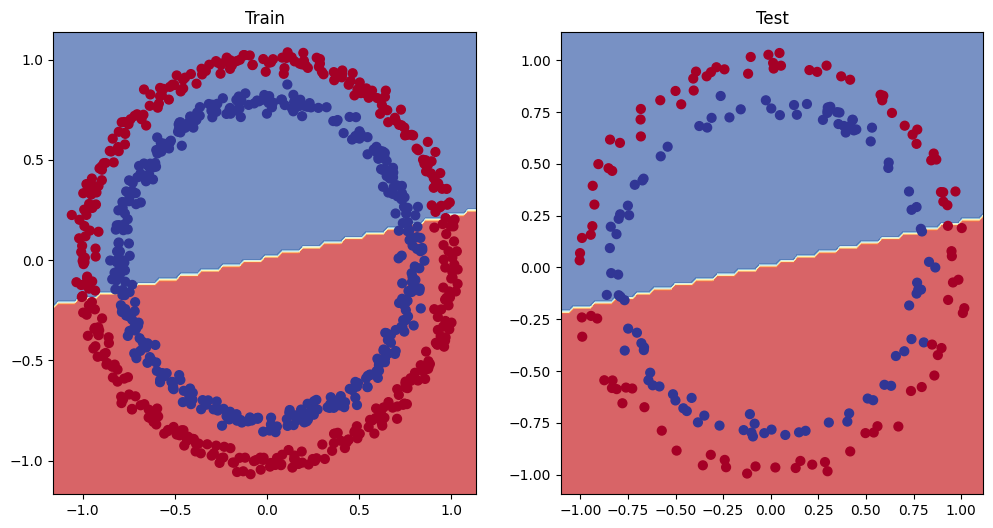

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(circleModel1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(circleModel1, X_test, y_test)

In [ ]:
from torch import nn
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.L1 = nn.Linear(in_features=2, out_features=10)
    self.L2 = nn.Linear(in_features=10, out_features=10)
    self.L3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.L3(self.relu(self.L2(self.relu(self.L1(x)))))


circleModel3 = CircleModelV3()
print(circleModel3)

CircleModelV3(
  (L1): Linear(in_features=2, out_features=10, bias=True)
  (L2): Linear(in_features=10, out_features=10, bias=True)
  (L3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(circleModel3.parameters(), lr=0.1)

In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  circleModel3.train()
  train_logits = circleModel3(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))

  train_loss = loss_fn(train_logits, y_train)
  train_acc = accuracy_fn(train_preds, y_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  circleModel3.eval()
  with torch.inference_mode():
    test_logits = circleModel3(X_train).squeeze()
    test_preds = torch.round(torch.sigmoid(X_train))

    test_loss = loss_fn(test_logits, y_train)
    test_acc = accuracy_fn(train_preds, y_train)


Epoch: 0 | Loss: 0.01204, Accuracy: 100.00% | Test Loss: 0.01203, Test Accuracy: 100.00%
Epoch: 100 | Loss: 0.01154, Accuracy: 100.00% | Test Loss: 0.01154, Test Accuracy: 100.00%
Epoch: 200 | Loss: 0.01109, Accuracy: 100.00% | Test Loss: 0.01109, Test Accuracy: 100.00%
Epoch: 300 | Loss: 0.01067, Accuracy: 100.00% | Test Loss: 0.01067, Test Accuracy: 100.00%
Epoch: 400 | Loss: 0.01028, Accuracy: 100.00% | Test Loss: 0.01028, Test Accuracy: 100.00%
Epoch: 500 | Loss: 0.00992, Accuracy: 100.00% | Test Loss: 0.00992, Test Accuracy: 100.00%
Epoch: 600 | Loss: 0.00959, Accuracy: 100.00% | Test Loss: 0.00958, Test Accuracy: 100.00%
Epoch: 700 | Loss: 0.00927, Accuracy: 100.00% | Test Loss: 0.00927, Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.00898, Accuracy: 100.00% | Test Loss: 0.00898, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.00871, Accuracy: 100.00% | Test Loss: 0.00871, Test Accuracy: 100.00%


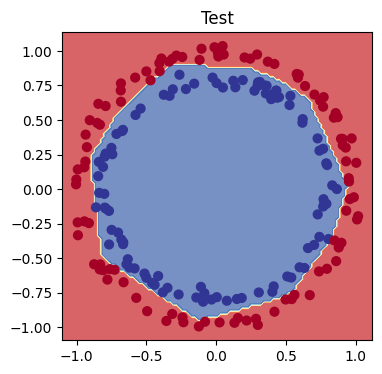

In [50]:
# @title
# Plot decision boundaries for training and test sets
plt.figure(figsize=(4, 4))
plt.title("Test")
plot_decision_boundary(circleModel3, X_test, y_test) # model_3 = has non-linearity

## Non-linear Activation Functions

### ReLU

In [1]:
import torch

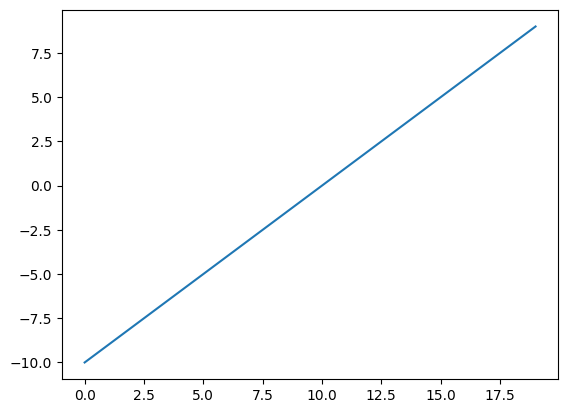

In [3]:
import matplotlib.pyplot as plt

A = torch.arange(-10, 10, 1)
plt.plot(A)

In [4]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

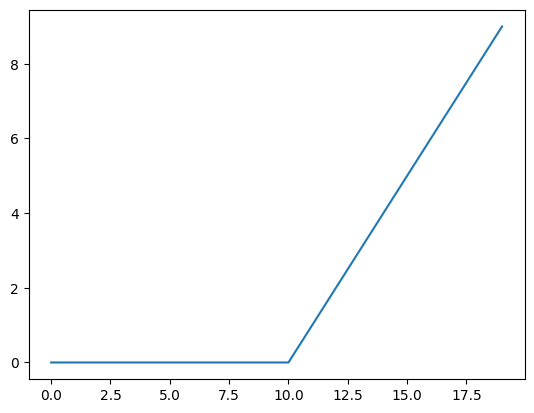

In [5]:
plt.plot(relu(A))

In [6]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

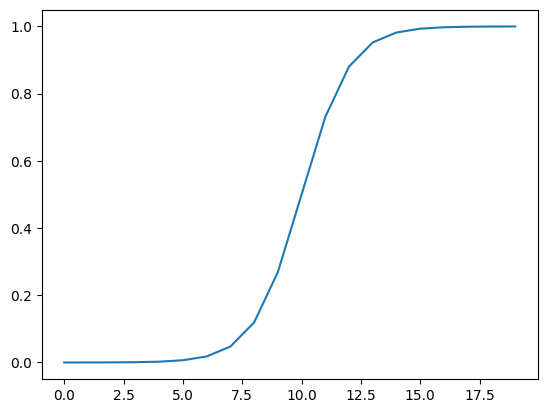

In [7]:
plt.plot(sigmoid(A))

We essentially went from a straight linear relationship to a curved line. Makes you think about all the patterns you could draw using unlimited amount of linear and non-linear lines.

## Building a multi-class PyTorch model

We will begin by creating some multi-class data. We can use `make_blobs()` by Scikit-Learn. We can create any number of classes we wish.

Let's do the following:
1. Create sample data using `make_blobs()`
2. Turn data into tensors (`make_blobs()` uses NumPy arrays)
3. Split data using `train_test_split()`
4. Visualize

In [21]:
# @title
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

1. Creating data with `make_blobs()`. Set NUM_CLASS = 4
NUM_FEATURES = 2

In [22]:
# @title
NUM_CLASS = 4
NUM_FEATURES = 2
seed = 42

X_blob, y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASS,
    cluster_std=1.5,
    random_state=seed
)

2. Turn data into tensors using `from_numpy(...).type(...)`
Use float for `X_blob` and LongTensor for `y_blob` cause the loss function takes in long.

In [23]:
# @title
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


3. Split into train and test sets (test, train)

In [24]:
# @title
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob,
    y_blob,
    test_size=0.2,
    random_state=seed
)

4. Plot the data (set the figure size to be (10,7).

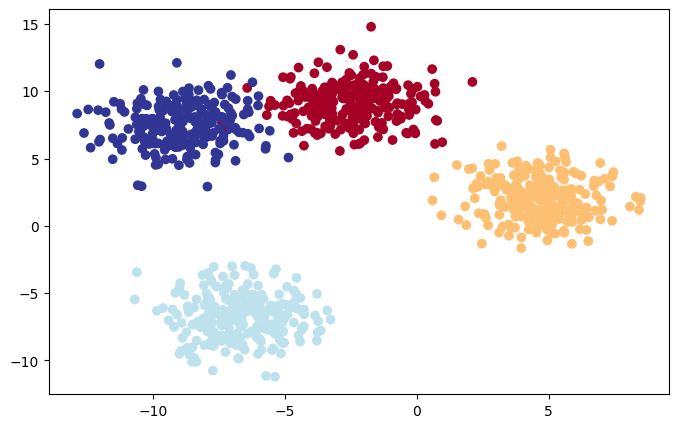

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

Intuitive question: Does this dataset need non-linearity? Or could we draw a bunch of straight lines to separate it?

### Building the Blob Model

Import nn.

Create Blob Model class with input features, output features and hidden units as parameters in constructor.

Use nn.Sequential to create 3 linear layers

In [11]:
# @title
from torch import nn
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


Create the instance of the class under a new model name. Input features are number of features, output features are the number of classes and hidden units can be set according to preference.

In [12]:
# @title
model_4 = BlobModel(
    input_features=NUM_FEATURES,
    output_features=NUM_CLASS,
    hidden_units=8
)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

Create the loss function (using CrossEntropyLoss) and SGD for the optimizer.

In [14]:
# @title
CEloss_fn = nn.CrossEntropyLoss()
blobOptimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

Let's perform one forward pass on the data and try to interpret what the output signifies.
The raw outputs of the model are the **logits.**

In [20]:
z = model_4(X_blob_train)
z_pred_probs = torch.softmax(z, dim=1)
print(z[:5])
print(z_pred_probs[:5])

tensor([[-0.7165, -0.6078, -1.0621, -0.2217],
        [-1.2727,  1.4376, -0.4562,  1.5900],
        [ 1.0074,  1.1507,  1.9578,  0.6605],
        [ 0.4199,  1.0125,  1.2074,  0.7298],
        [-0.9896,  1.3982, -0.1588,  1.4715]], grad_fn=<SliceBackward0>)
tensor([[0.2241, 0.2498, 0.1586, 0.3675],
        [0.0279, 0.4199, 0.0632, 0.4890],
        [0.1836, 0.2119, 0.4748, 0.1298],
        [0.1570, 0.2839, 0.3451, 0.2140],
        [0.0386, 0.4204, 0.0886, 0.4524]], grad_fn=<SliceBackward0>)


The outputs for these will be random now cause we haven't trained the model. However, softmax does something very specific to each row of the output. Each individual sample now adds to ~1. For instance try using torch.sum to add up the first row of z_pred_probs

In [18]:
# @title
torch.sum(z_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

What the prediction probabilities `z_pred_probs` mean: the probability that the model thinks the target `X` maps to each class. For instance, there is a 36.75% probability that the sample belongs to class 4.

## Building the Training Loop

Set manual seed, number of epochs (and move data to gpu/cpu if required).
Within the for loop, we will have a train loop and a test loop. Under both, we will create logits by forward passing on test and train data. We will then convert the logits to prediction labels using softmax `torch.softmax(y_logits, dim=1).argmax(dim=1)`. Create the loss function (CrossEntropyLoss) and the optimizer (SGD), and calculate the loss. The loss takes in the logits and the y train & test data as input paramters. Under the training mode, we reset the gradients, perform backward propagation and then step the optimizer.

The softmax function converts logits into probabilities.

It exponentiates each value and normalizes across `dim=1` (the class dimension) so that all class probabilities sum to 1 for each sample. `argmax` returns the index of the largest value along a given dimension.

In [33]:
def accuracy_fn(predictions, trueLabels):
  corr = torch.eq(predictions, trueLabels).sum().item()
  return (corr/len(trueLabels))*100

In [42]:
# @title
torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
  model_4.train()
  z_train = model_4(X_blob_train)
  z_train_preds = torch.softmax(z_train, dim=1).argmax(dim=1)

  train_loss = CEloss_fn(z_train, y_blob_train)
  train_acc = accuracy_fn(z_train_preds, y_blob_train)

  blobOptimizer.zero_grad()
  train_loss.backward()
  blobOptimizer.step()

  model_4.eval()
  with torch.inference_mode():
    z_test = model_4(X_blob_test)
    z_test_preds = torch.softmax(z_test, dim=1).argmax(dim=1)
    test_loss = CEloss_fn(z_test, y_blob_test)
    test_acc = accuracy_fn(z_test_preds, y_blob_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.02429, Train Acc: 99.12 | Test Loss: 0.01285, Test Acc: 99.50%
Epoch: 10 | Loss: 0.02427, Train Acc: 99.12 | Test Loss: 0.01282, Test Acc: 99.50%
Epoch: 20 | Loss: 0.02425, Train Acc: 99.12 | Test Loss: 0.01280, Test Acc: 99.50%
Epoch: 30 | Loss: 0.02423, Train Acc: 99.25 | Test Loss: 0.01278, Test Acc: 99.50%
Epoch: 40 | Loss: 0.02421, Train Acc: 99.25 | Test Loss: 0.01276, Test Acc: 99.50%
Epoch: 50 | Loss: 0.02419, Train Acc: 99.25 | Test Loss: 0.01274, Test Acc: 99.50%
Epoch: 60 | Loss: 0.02416, Train Acc: 99.25 | Test Loss: 0.01271, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02414, Train Acc: 99.25 | Test Loss: 0.01269, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02412, Train Acc: 99.25 | Test Loss: 0.01267, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02410, Train Acc: 99.25 | Test Loss: 0.01265, Test Acc: 99.50%


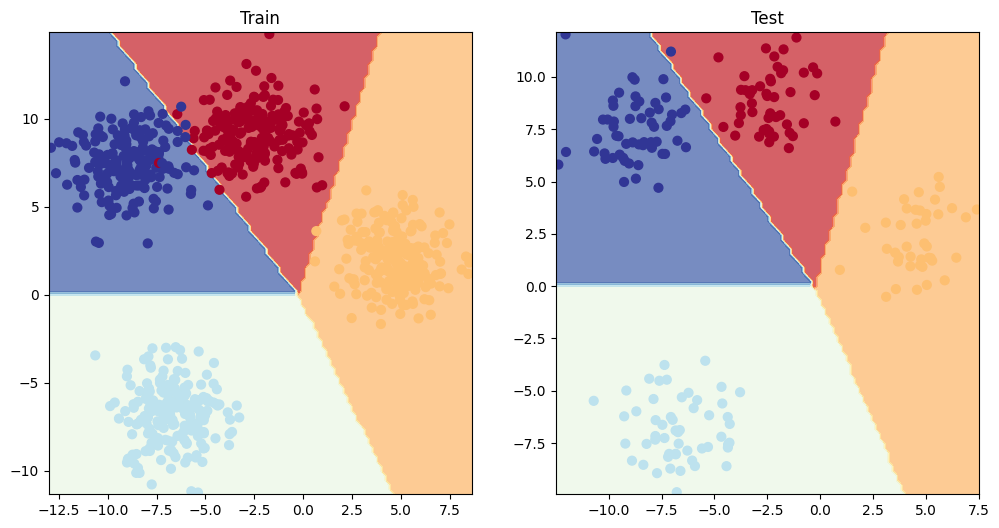

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## Measures of classification evaluaiton metrics

#### Accuracy
Out of all the predictions, how many were correct.

Good for balanced datasets, where all classes appear equally as often. Could be misleading for imbalanced datasets **(WHY)**

#### Precision

Of all the times that the model predicted "Positive", how many of them were actually positive?

High precision means few false positives (diagnosing a disease when the person is healthy).Useful when false positives are costly.

#### Recall

#### F1-Score

#### Confusion Matrix